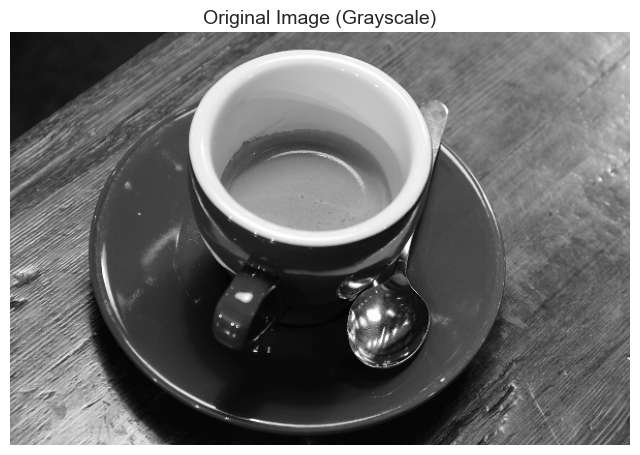

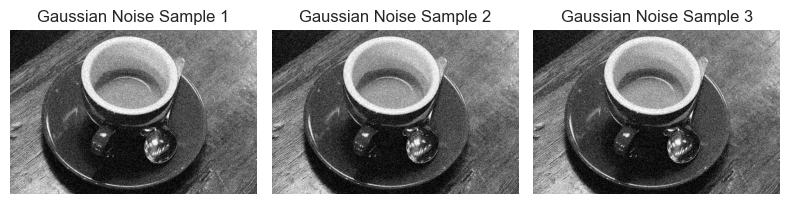

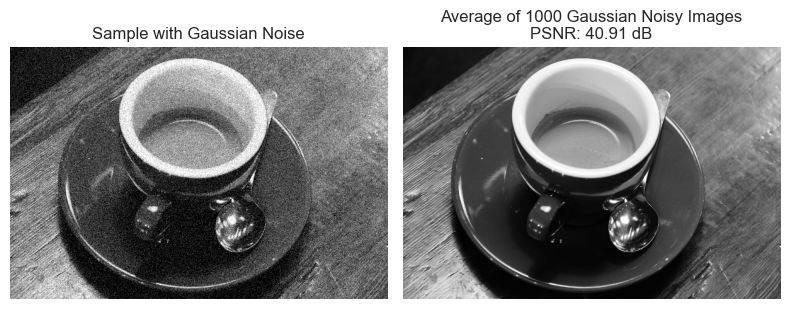

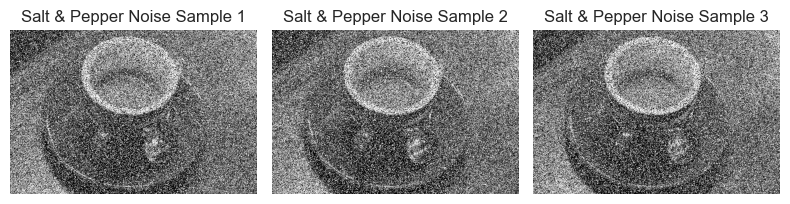

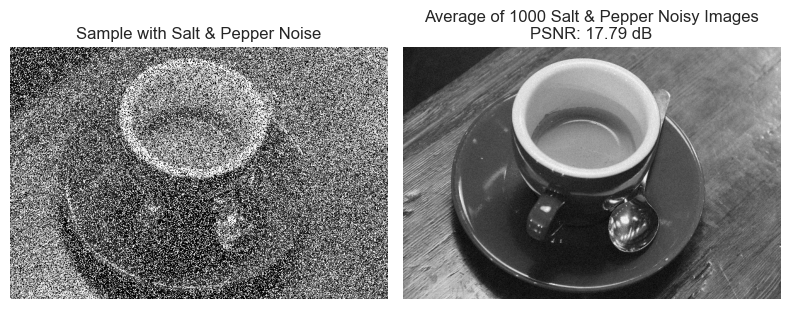

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr

plt.rcParams['figure.figsize'] = (8, 8)

coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

plt.figure()
plt.imshow(gray_coffee, cmap='gray')
plt.title('Original Image (Grayscale)', fontsize=14)
plt.axis('off')
plt.show()

num_noisy_images = 1000

def create_gaussian_noisy_images(image, n, var=0.01):
    return [random_noise(image, mode='gaussian', var=var) for _ in range(n)]

gaussian_noisy_images = create_gaussian_noisy_images(gray_coffee, num_noisy_images)

plt.figure()
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(gaussian_noisy_images[i], cmap='gray')
    plt.title(f'Gaussian Noise Sample {i+1}', fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()

gaussian_avg_image = np.mean(gaussian_noisy_images, axis=0)
gaussian_psnr = psnr(gray_coffee, gaussian_avg_image)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(gaussian_noisy_images[0], cmap='gray')
plt.title('Sample with Gaussian Noise', fontsize=12)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gaussian_avg_image, cmap='gray')
plt.title(f'Average of {num_noisy_images} Gaussian Noisy Images\nPSNR: {gaussian_psnr:.2f} dB', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

def create_salt_pepper_noisy_images(image, n, amount=0.5):
    return [random_noise(image, mode='s&p', amount=amount) for _ in range(n)]

sp_noisy_images = create_salt_pepper_noisy_images(gray_coffee, num_noisy_images)

plt.figure()
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(sp_noisy_images[i], cmap='gray')
    plt.title(f'Salt & Pepper Noise Sample {i+1}', fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()

sp_avg_image = np.mean(sp_noisy_images, axis=0)
sp_psnr = psnr(gray_coffee, sp_avg_image)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(sp_noisy_images[0], cmap='gray')
plt.title('Sample with Salt & Pepper Noise', fontsize=12)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sp_avg_image, cmap='gray')
plt.title(f'Average of {num_noisy_images} Salt & Pepper Noisy Images\nPSNR: {sp_psnr:.2f} dB', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()


<style>
    .rtl { text-align: right; direction: rtl; font-size: 16px; line-height: 2; }
    .ltr { text-align: left; direction: ltr; }
</style>

<p dir="rtl" style="text-align: right; font-size: 16px; line-height: 2;">
 توضیح ریاضی کاهش نویز گوسی با میانگین‌گیری : 
</p>

<p dir="rtl" style="text-align: right;">
<b>تعریف مدل</b>  
فرض کنیم که \( x \) تصویر اصلی (سیگنال) ما باشد و \( y_i \) مشاهده‌ی \( i \)-ام نویزی آن باشد:
</p>

$$ y_i = x + n_i $$

<p dir="rtl" style="text-align: right;">
که در آن \( n_i \) نویز گوسی با میانگین صفر و واریانس \( \sigma^2 \) است، یعنی:
</p>

$$ n_i \sim \mathcal{N}(0, \sigma^2) $$

<p dir="rtl" style="text-align: right;">
<b> درفرآیند میانگین‌گیری</b>  
هنگامی که \( N \) مشاهده‌ی نویزی را میانگین‌گیری می‌کنیم، داریم:
</p>

$$ \bar{y} = \frac{1}{N} \sum_{i=1}^{N} y_i = \frac{1}{N} \sum_{i=1}^{N} (x + n_i) = x + \frac{1}{N} \sum_{i=1}^{N} n_i $$

<p dir="rtl" style="text-align: right;"> 
مجموع متغیرهای تصادفی گوسی مستقل نیز یک متغیر تصادفی گوسی است. به طور خاص، اگر:
</p>

$$ n_i \sim \mathcal{N}(0, \sigma^2) $$

<p dir="rtl" style="text-align: right;">
داشته باشیم، آنگاه:
</p>

$$ \sum_{i=1}^{N} n_i \sim \mathcal{N}(0, N\sigma^2) $$

<p dir="rtl" style="text-align: right;">
بنابراین، میانگین نویز‌ها توزیع زیر را دارد:
</p>

$$ \frac{1}{N} \sum_{i=1}^{N} n_i \sim \mathcal{N}(0, \frac{\sigma^2}{N}) $$

<p dir="rtl" style="text-align: right;">
این نتیجه نشان می‌دهد که واریانس نویز در تصویر میانگین‌شده با ضریب \( N \) کاهش می‌یابد:
</p>

$$ \text{Var}\left(\frac{1}{N} \sum_{i=1}^{N} n_i\right) = \frac{\sigma^2}{N} $$

<p dir="rtl" style="text-align: right;">
هر چه \( N \) بزرگ‌تر شود، واریانس نویز به صفر نزدیک‌تر می‌شود، به این معنی که نویز به طور فزاینده‌ای حذف می‌شود.
</p>

<p dir="rtl" style="text-align: right;">
<b>چرا این روش برای نویز گوسی مؤثر است اما برای نویز فلفل نمکی نه؟</b>  
نویز گوسی همه‌ی پیکسل‌ها را تحت تأثیر قرار می‌دهد اما تغییرات آن کوچک و تصادفی است. به دلیل داشتن میانگین صفر و اثرگذاری بر تمام پیکسل‌ها، این تغییرات در میانگین‌گیری تمایل به حذف شدن دارند.
اما نویز فلفل نمکی باعث ایجاد مقادیر بسیار بالا (سفید) یا بسیار پایین (سیاه) در مکان‌های تصادفی می‌شود. هنگام میانگین‌گیری:
1. این مقادیر افراطی انحراف‌های بزرگی از مقدار واقعی ایجاد می‌کنند.
2. مکان این نویزها در هر تصویر متفاوت است.
3. میانگین حسابی نسبت به مقادیر پرت حساس است.
برای مثال، اگر یک پیکسل در یکی از ۱۰ تصویر مقدار ۱ (سفید) بگیرد، میانگین آن همچنان ۰.۱ افزایش می‌یابد که قابل توجه است. به همین دلیل، فیلتر میانگین برای نویز فلفل نمکی چندان مؤثر نیست
</p>
